In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("/Users/Dataset/pima-indians-diabetes.xlsx")

In [3]:
df.head()

,Pregnancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFUnction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()

,Pregnancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFUnction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFUnction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Check the corelation of 'Outcomes' (target variable ) with other feature

In [5]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
Bloodpressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFUnction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
Bloodpressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFUnction    0
Age                         0
Outcome                     0
dtype: int64

## Separating Feature and Target variable

In [7]:
feature = df.iloc[:,:-1]
target = df.iloc[:,-1]

## Scaling features

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scale = StandardScaler()
feature = scale.fit_transform(feature)

## Split data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, shuffle=True, random_state=True)

## Make Model for NN

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

#### Self model design section

In [13]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

Metal device set to: Apple M2


In [14]:
history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/100


2023-06-11 21:05:19.735217: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 0s 14ms/step - loss: 0.7379 - accuracy: 0.5130 - val_loss: 0.6980 - val_accuracy: 0.5519
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.6270 - val_loss: 0.6413 - val_accuracy: 0.6364
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6153 - accuracy: 0.6954 - val_loss: 0.5992 - val_accuracy: 0.7208
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5781 - accuracy: 0.7199 - val_loss: 0.5677 - val_accuracy: 0.7403
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.7264 - val_loss: 0.5452 - val_accuracy: 0.7597
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5304 - accuracy: 0.7443 - val_loss: 0.5273 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.7557 - val_loss: 0.5115 - val_accuracy: 0.7792
Epoch 8/100
20/20 [=====

Epoch 59/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.7866 - val_loss: 0.4577 - val_accuracy: 0.7792
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4300 - accuracy: 0.7850 - val_loss: 0.4579 - val_accuracy: 0.7792
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4289 - accuracy: 0.7883 - val_loss: 0.4586 - val_accuracy: 0.7792
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4291 - accuracy: 0.7899 - val_loss: 0.4580 - val_accuracy: 0.7857
Epoch 63/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4285 - accuracy: 0.7883 - val_loss: 0.4576 - val_accuracy: 0.7857
Epoch 64/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.7866 - val_loss: 0.4573 - val_accuracy: 0.7792
Epoch 65/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4279 - accuracy: 0.7899 - val_loss: 0.4575 - val_accuracy: 0.7857
Epoch 

#### Checking Loss and accuracy over train and test data

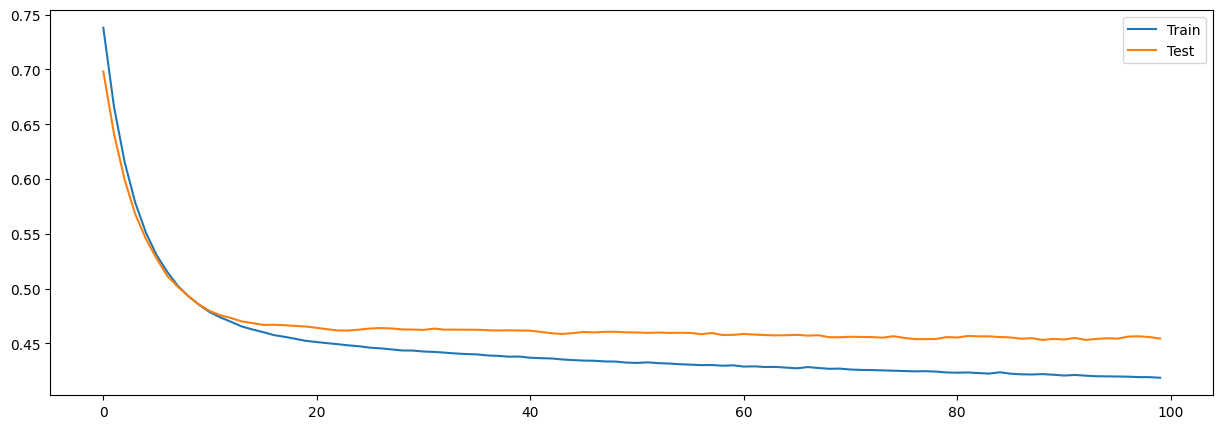

In [15]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.legend(['Train','Test'],loc='upper right')
plt.show();

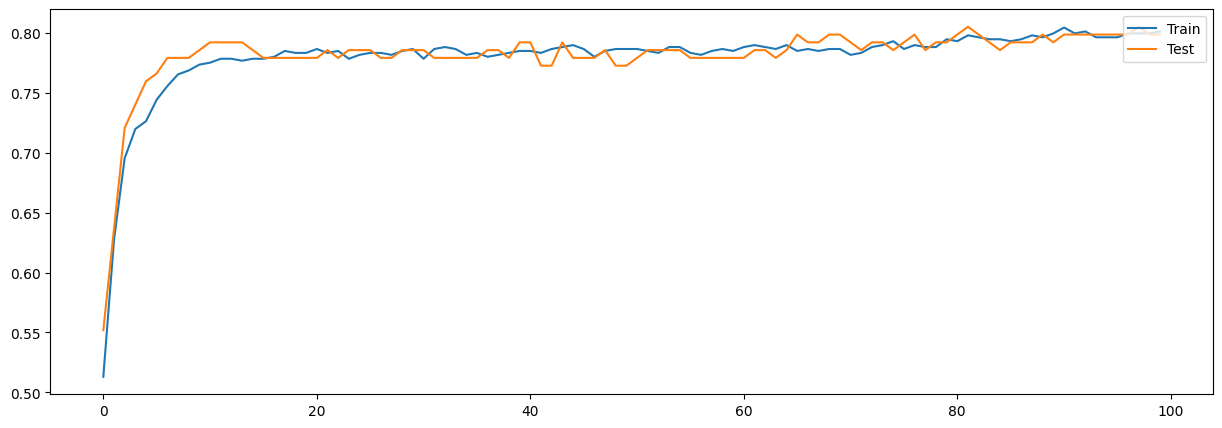

In [16]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['Train','Test'],loc='upper right')
plt.show();

## Hyperparameter selection for Optimizer
* How to select appropriate optimizer
* Number of nodes in a layer
* How to select number of layers

In [17]:
import keras_tuner as kt

In [18]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=hp.Choice('optimizer',['adam','sgd','rmsprop','adadelta']), metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials=5)


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [19]:
tuner.search(xtrain, ytrain, epochs=5, validation_data=(xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [20]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

#### Using best hyperparameter

In [21]:
model = tuner.get_best_models(num_models=1)[0]

In [29]:
history_new = model.fit(xtrain, ytrain, epochs=100,initial_epoch=6, batch_size=32, validation_data=(xtest, ytest))

Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3920 - accuracy: 0.8257 - val_loss: 0.4539 - val_accuracy: 0.8052
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3916 - accuracy: 0.8241 - val_loss: 0.4554 - val_accuracy: 0.7987
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3921 - accuracy: 0.8257 - val_loss: 0.4550 - val_accuracy: 0.7987
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.8208 - val_loss: 0.4552 - val_accuracy: 0.7987
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3914 - accuracy: 0.8241 - val_loss: 0.4558 - val_accuracy: 0.8052
Epoch 12/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3910 - accuracy: 0.8290 - val_loss: 0.4544 - val_accuracy: 0.8117
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3907 - accuracy: 0.8241 - val_loss: 0.4549 - val_accuracy: 0.8052
Epoch 14/

Epoch 65/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3813 - accuracy: 0.8225 - val_loss: 0.4577 - val_accuracy: 0.8117
Epoch 66/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.8192 - val_loss: 0.4574 - val_accuracy: 0.8117
Epoch 67/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3800 - accuracy: 0.8208 - val_loss: 0.4571 - val_accuracy: 0.8182
Epoch 68/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3803 - accuracy: 0.8241 - val_loss: 0.4573 - val_accuracy: 0.8117
Epoch 69/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3796 - accuracy: 0.8274 - val_loss: 0.4583 - val_accuracy: 0.8117
Epoch 70/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3796 - accuracy: 0.8241 - val_loss: 0.4589 - val_accuracy: 0.8117
Epoch 71/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3791 - accuracy: 0.8274 - val_loss: 0.4585 - val_accuracy: 0.8052
Epoch 

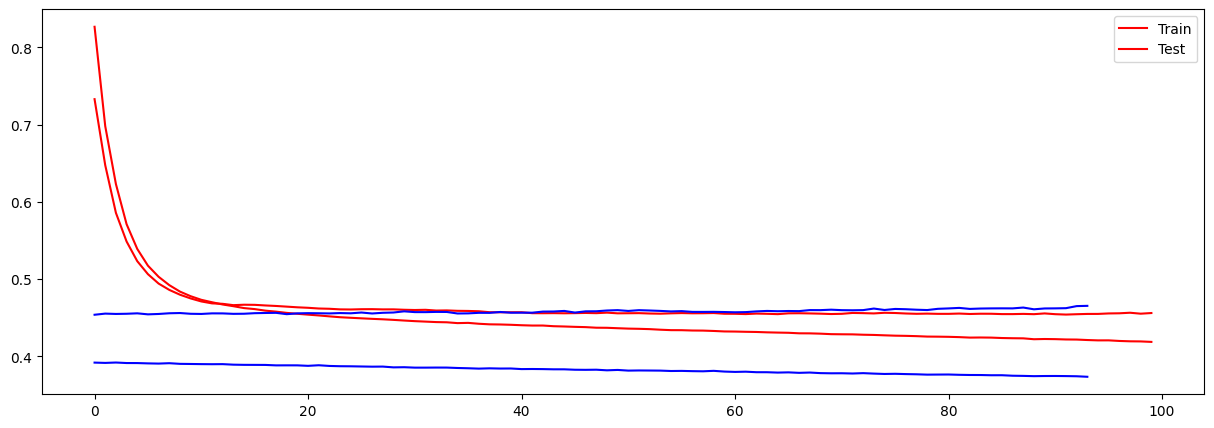

In [30]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'],c='r');
plt.plot(history.history['val_loss'],c='r');

plt.plot(history_new.history['loss'],c='b');
plt.plot(history_new.history['val_loss'],c='b');
plt.legend(['Train','Test'],loc='upper right')
plt.show();

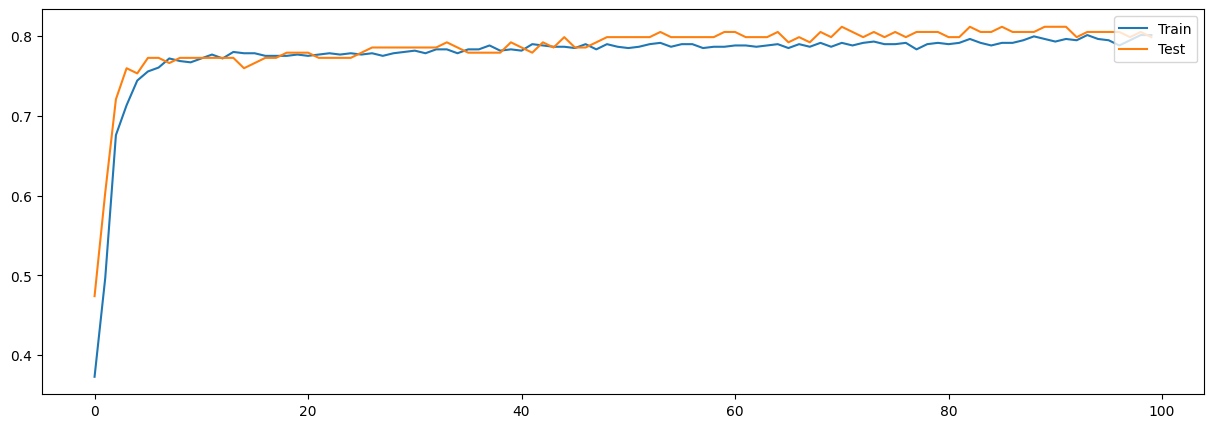

In [31]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);
plt.legend(['Train','Test'],loc='upper right')
plt.show();

## Hyperparameter selection for neurons

In [46]:
def build_model(hp):
    model = Sequential()
#     unit = hp.int(8,128,8)
    model.add(Dense(units = hp.Int('units', min_value=8,max_value=128,steps=8), activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials=5)

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [47]:
tuner.search(xtrain, ytrain, epochs=5, validation_data=(xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [48]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [45]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

## Hyperparameter for layers

In [50]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72, activation='relu', input_dim=8))
    
    for i in range(hp.Int('num_layers',min_value=1, max_value=10)):
        model.add(Dense(72, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials=5)

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [51]:
tuner.search(xtrain, ytrain, epochs=5, validation_data=(xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [52]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}